In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("AutoImmune Market Master Data.xlsx",sheet="Customer Profile information")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
#df

In [5]:
df.columns

Index([u'FINDr ID', u'ONEKEY', u'LILLY ID', u'LAST NAME',
       u'FIRST & MIDDLE NAME', u'PRIME SPECIALTY', u'PRIME INTEREST',
       u'SPEC ADJ', u'SPEC Scheme', u'LANGUAGE', u'GENDER', u'GRAD YEAR',
       u'ADDRESS TYPE', u'BUILDING NAME_ORG NAME', u'STREET ADDRESS1',
       u'STREET ADDRESS2', u'CITY', u'PROVINCE', u'POSTAL CODE',
       u'PHONE NUMBER', u'FAX NUMBER', u'FSA', u'DATA SOURCE',
       u'RA Blx Market Potential', u'RA cDMARDs Market Potential',
       u'RA Combined Market Potential', u'RA Launch Attractiveness',
       u'RA Final Segments', u'RA Target Flag', u'RA Group',
       u'RA - Calls in 2017', u'RA Include', u'TRx RA Blx Label',
       u'TRx RA cDMARDs Label', u'Avg. TRx RA Blx', u'Avg. TRx RA cDMARDs',
       u'NBRx RA Blx Label', u'NBRx RA cDMARDs Label', u'Avg. NBRx RA Blx',
       u'Avg. NBRx RA cDMARDs', u'RA Adoption Label',
       u'RA Private Volume Label', u'RA % Private', u'RA % Enbrel',
       u'RA % Humira', u'RA % Xeljanz', u'PSA Blx Market Poten

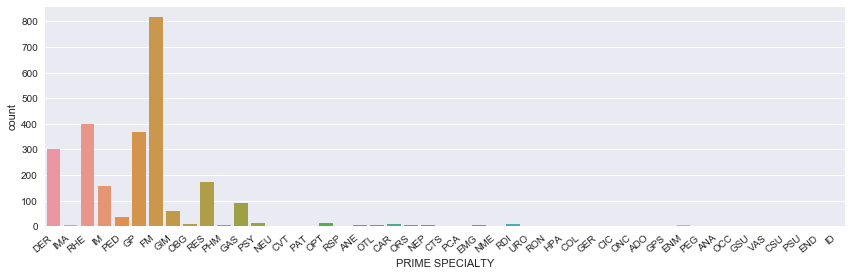

In [6]:
plt.figure(figsize=(12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x='PRIME SPECIALTY', data=df, linewidth=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

The focus of this analysis will be on RHE so we will filter out non RHE / IM specialties.

In [7]:
 df_filter = df[df['PRIME SPECIALTY'].isin(['IM','RHE'])]

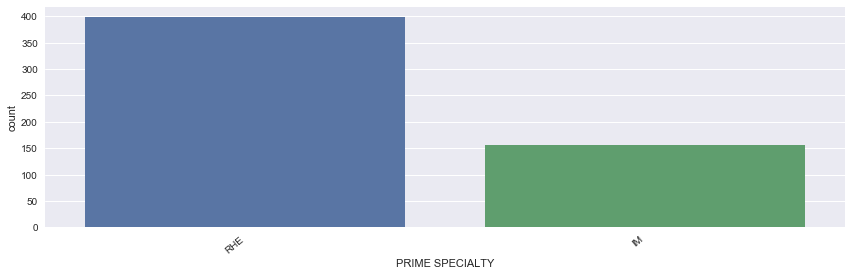

In [8]:
plt.figure(figsize=(12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x='PRIME SPECIALTY', data=df_filter, linewidth=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### Distribution of Prime specialty by prime Interest


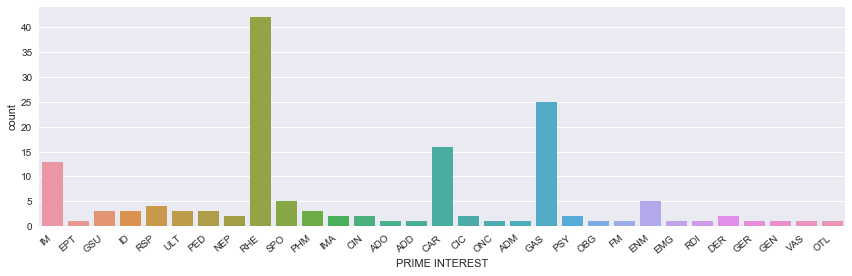

In [9]:
plt.figure(figsize=(12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x='PRIME INTEREST', data=df_filter, linewidth=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [10]:
pd.crosstab( df_filter['PRIME SPECIALTY'], df_filter['PRIME INTEREST'], margins=True)

PRIME INTEREST,ADD,ADM,ADO,CAR,CIC,CIN,DER,EMG,ENM,EPT,...,PED,PHM,PSY,RDI,RHE,RSP,SPO,ULT,VAS,All
PRIME SPECIALTY,,,,,,,,,,,,,,,,,,,,,
IM,0,0,0,11,1,0,2,1,4,0,...,0,1,0,1,42,3,0,0,1,97
RHE,1,1,1,5,1,2,0,0,1,1,...,3,2,2,0,0,1,5,3,0,53
All,1,1,1,16,2,2,2,1,5,1,...,3,3,2,1,42,4,5,3,1,150


In [11]:
pd.crosstab( df_filter['PRIME SPECIALTY'], df_filter['SPEC Scheme'], margins=True)

SPEC Scheme,0,SPEC,All
PRIME SPECIALTY,,,
IM,6,0,6
RHE,46,352,398
All,52,352,404


 Discussed "0" with the team, "0" seems not to be correct level in this variable.
 Hence this variable will be omitted from th analysis.

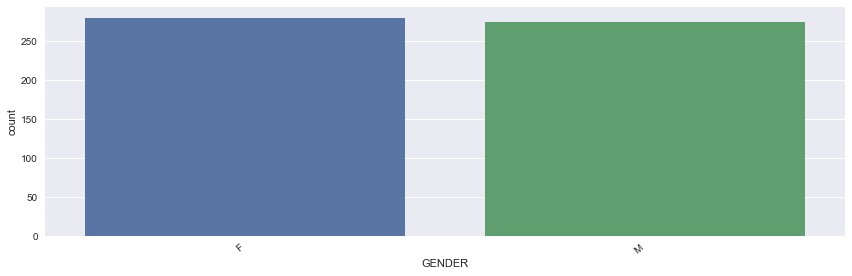

In [12]:
plt.figure(figsize=(12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x='GENDER', data=df_filter, linewidth=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

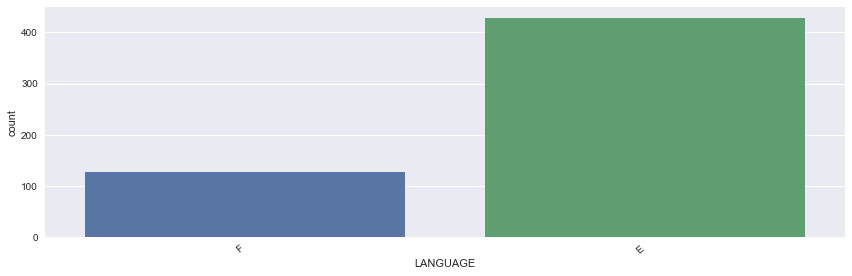

In [13]:
plt.figure(figsize=(12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x='LANGUAGE', data=df_filter, linewidth=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [15]:
def graph_var(varname):
    plt.figure(figsize=(12,4))
    sns.set(style="darkgrid")
    ax = sns.countplot(x=varname, data=df_filter, linewidth=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

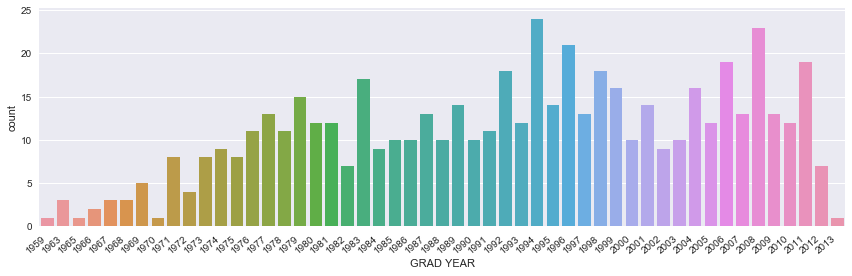

In [16]:
graph_var('GRAD YEAR')

Distribution of "GRAD YEAR" RHE and IMs: we Introduce a new variable: practice_yrs
```
Based on assumption that right after their graduation they can start practicing
```

In [20]:
df_filter['practice_yrs'] = 2018 - df_filter['GRAD YEAR'].apply(lambda x: int(x))

/Users/s6803068/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


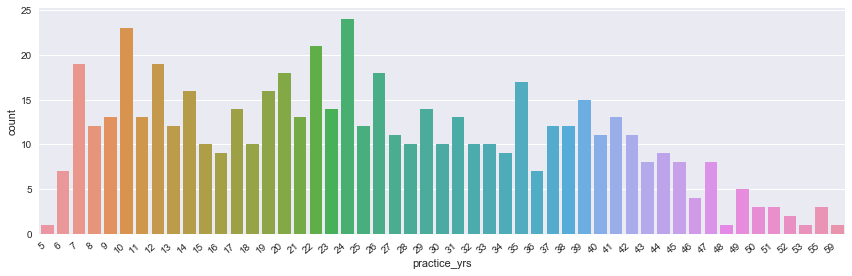

In [22]:
graph_var('practice_yrs')

Hypothesis:
Years in practice can be negatively correlated to openness in accepting change in new presciptions.
Younger practitioners are more open to change

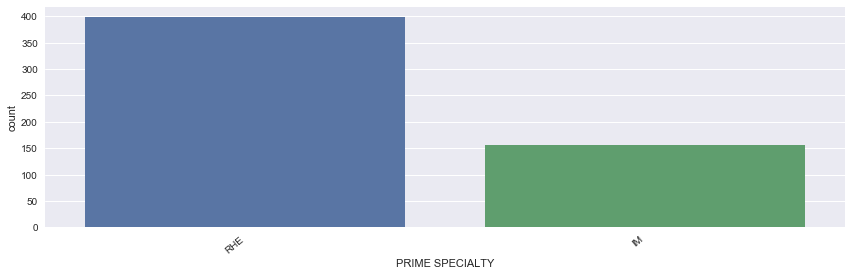

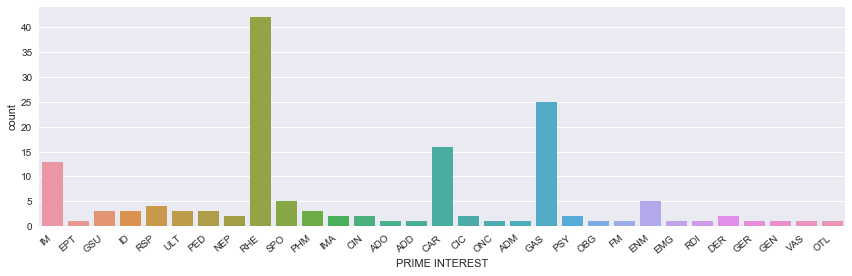

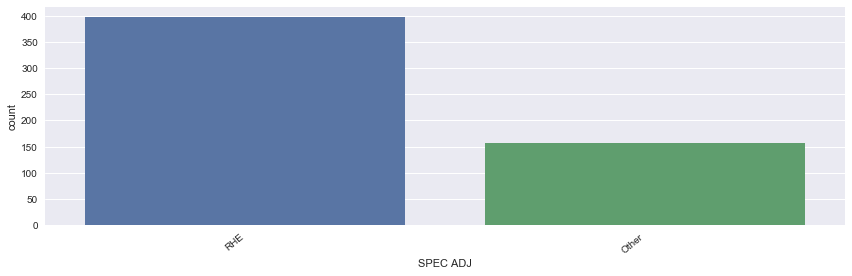

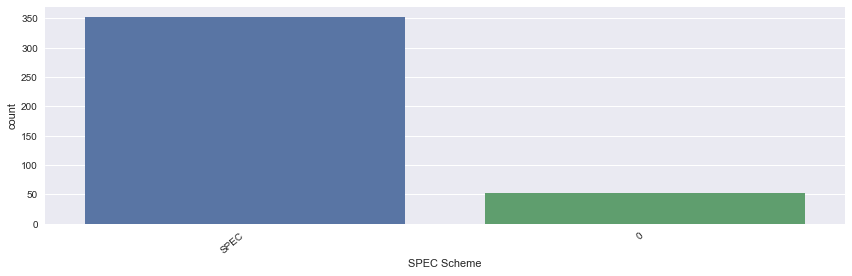

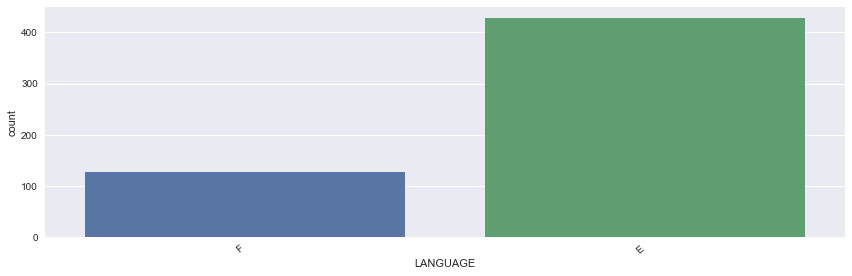

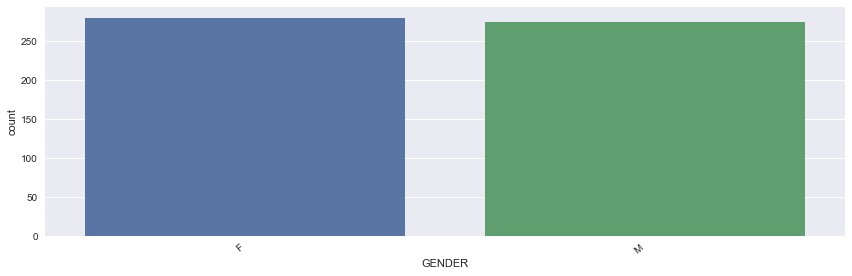

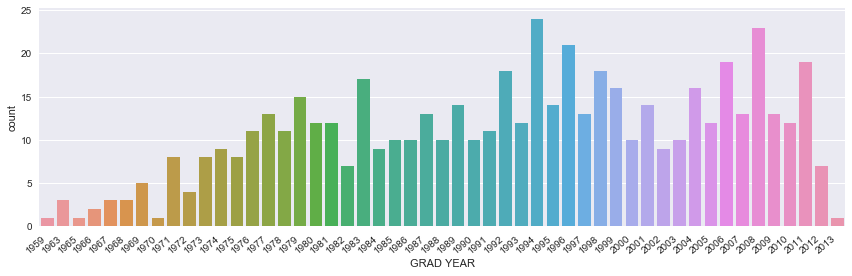

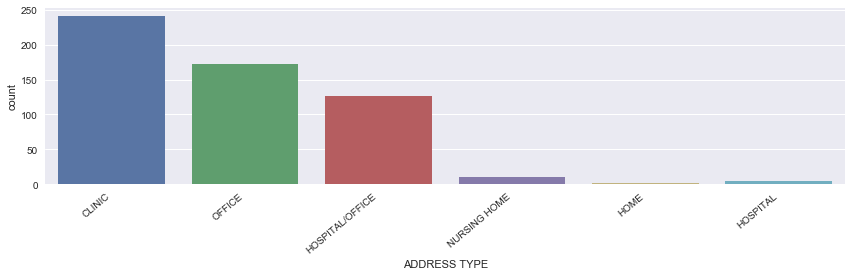

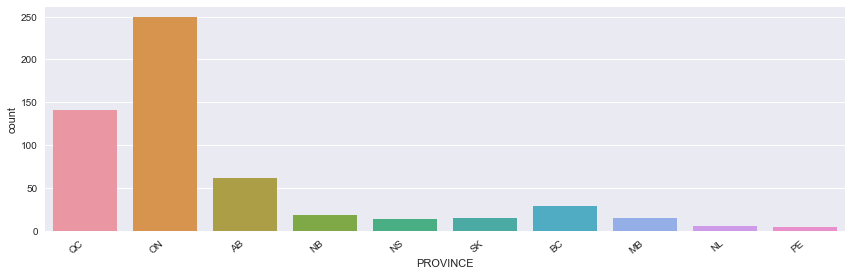

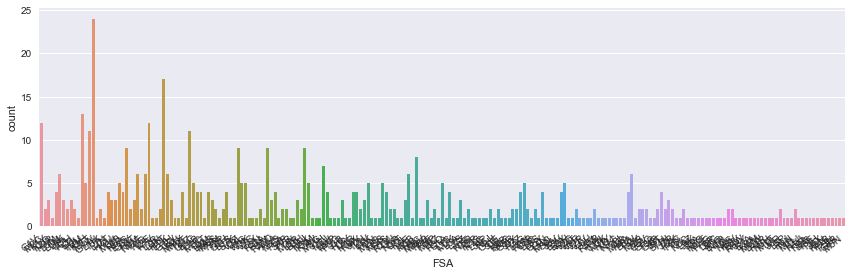

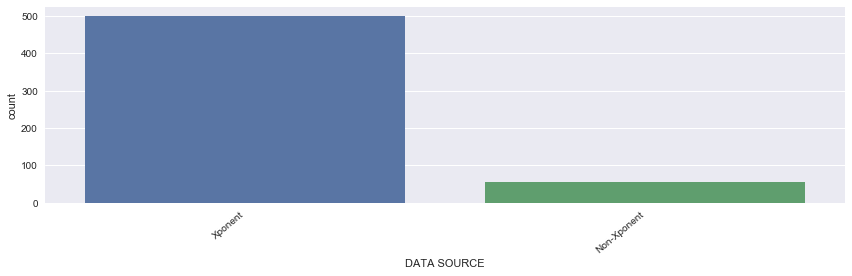

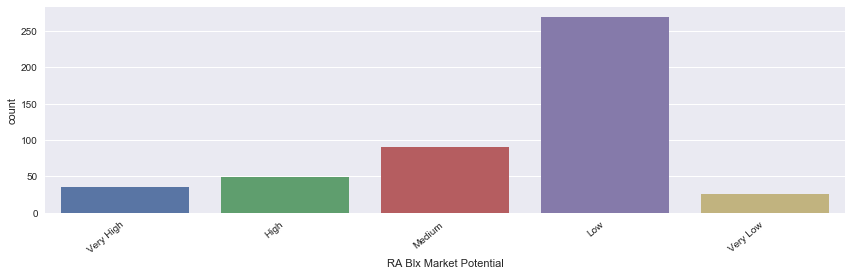

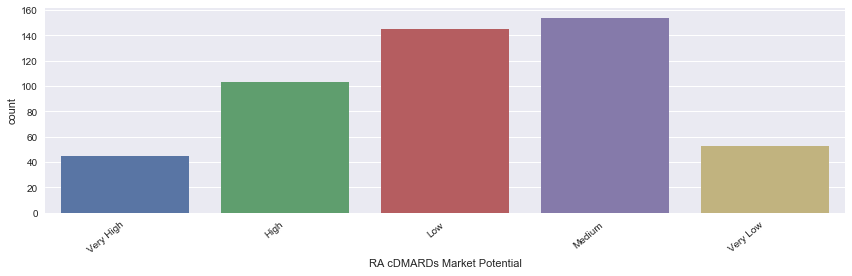

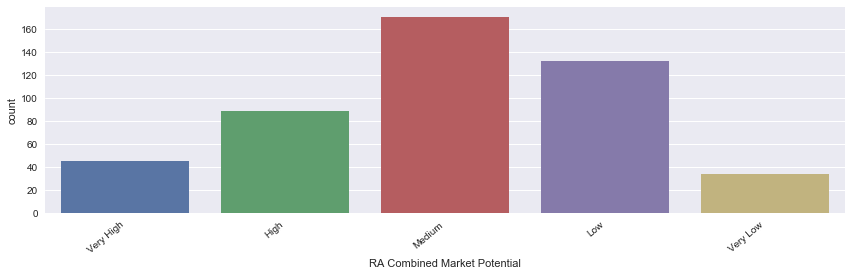

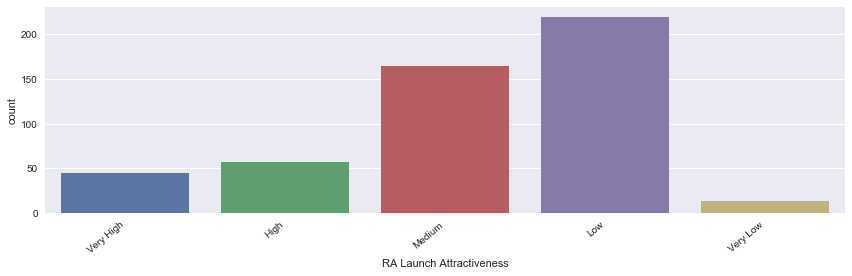

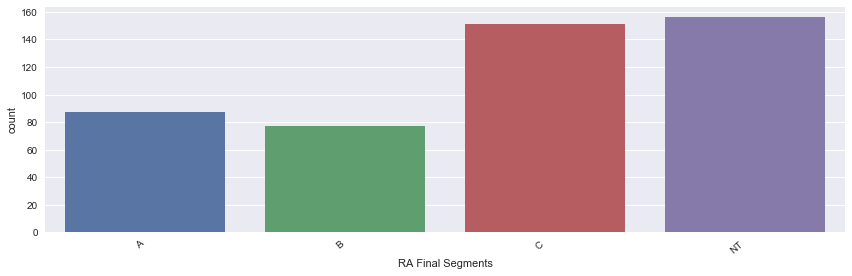

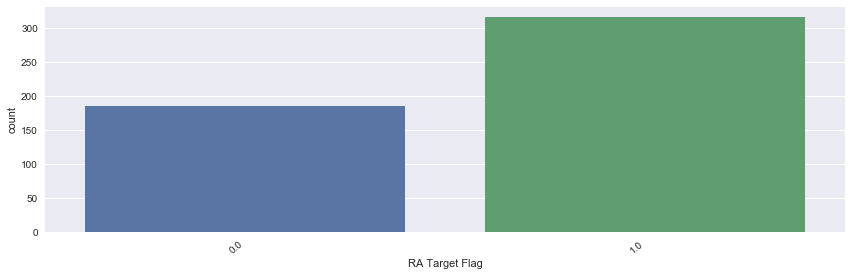

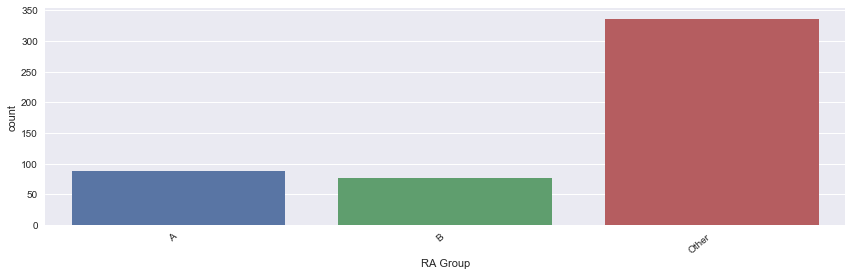

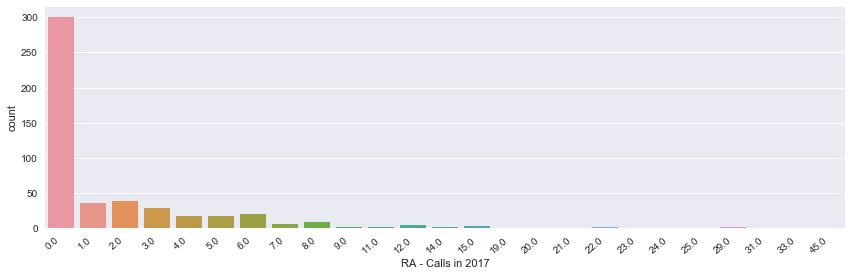

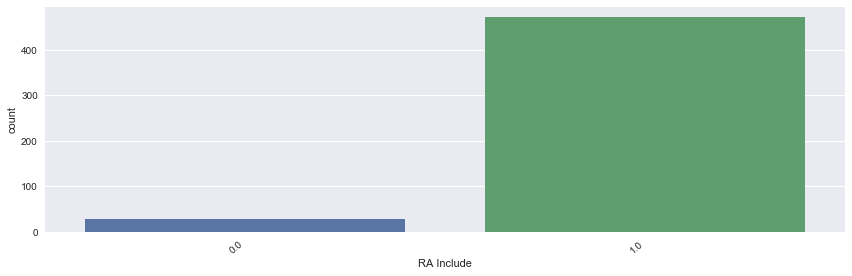

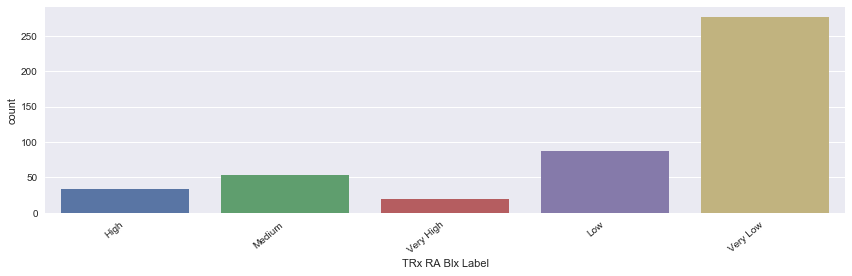

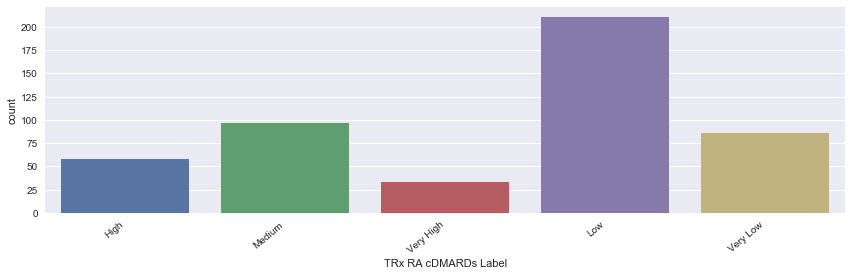

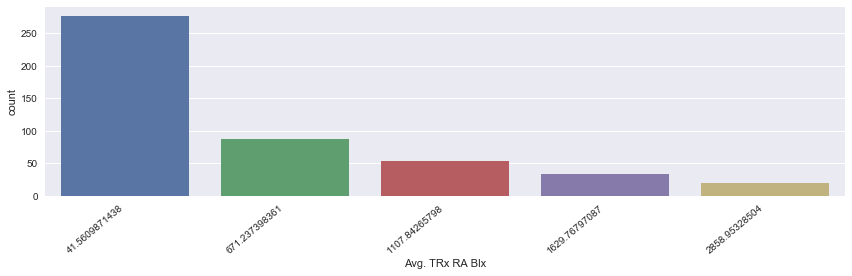

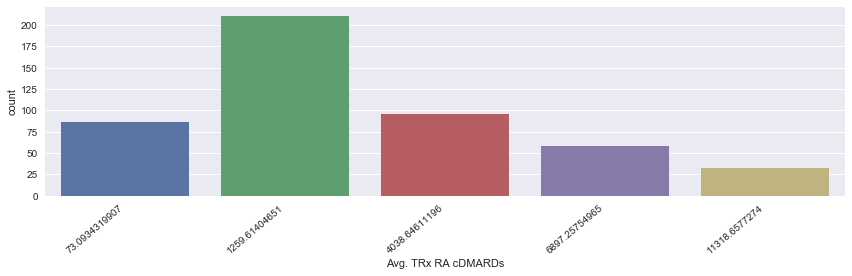

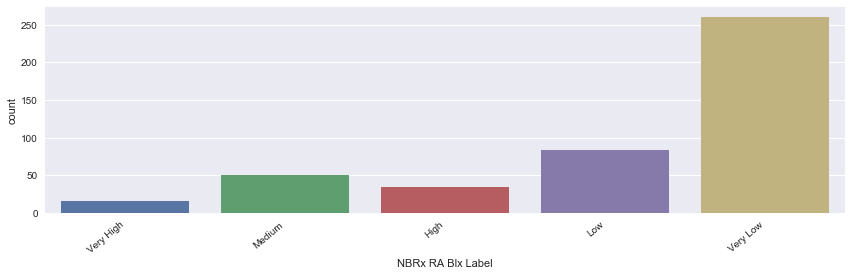

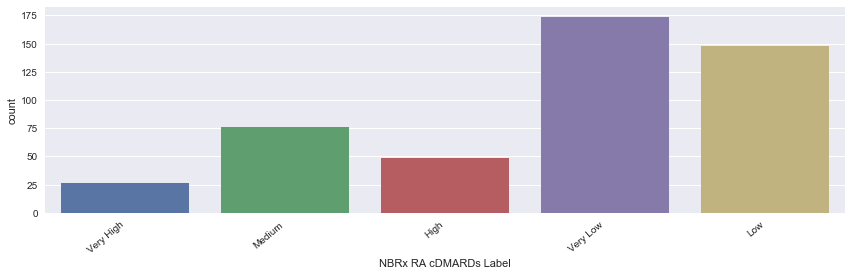

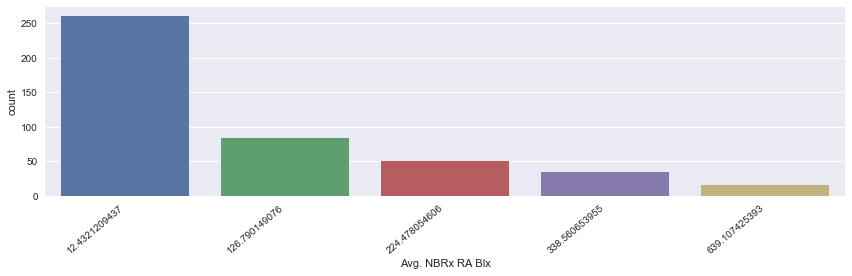

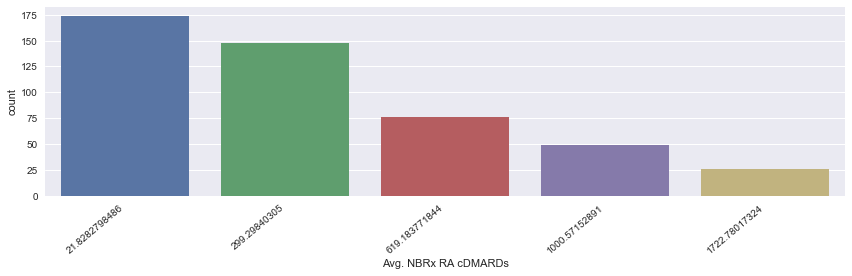

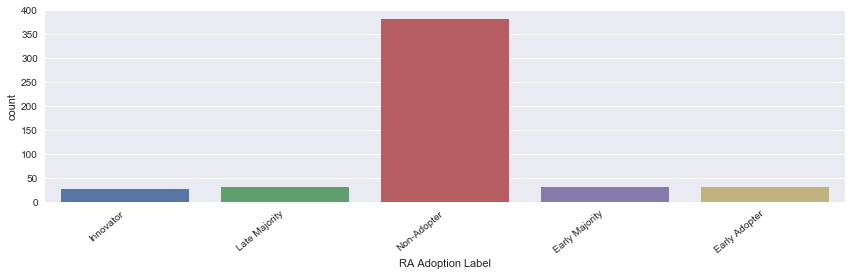

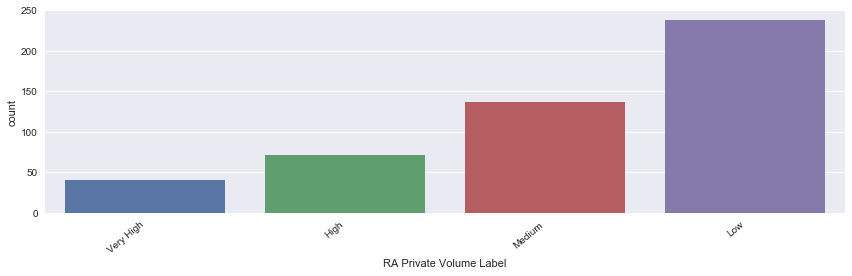

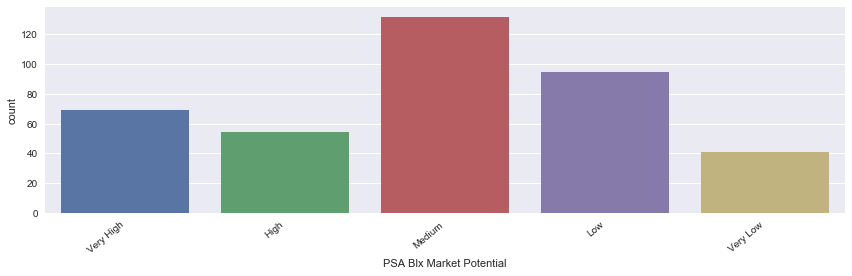

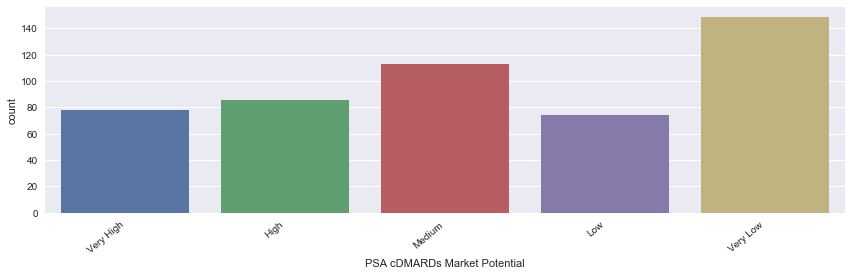

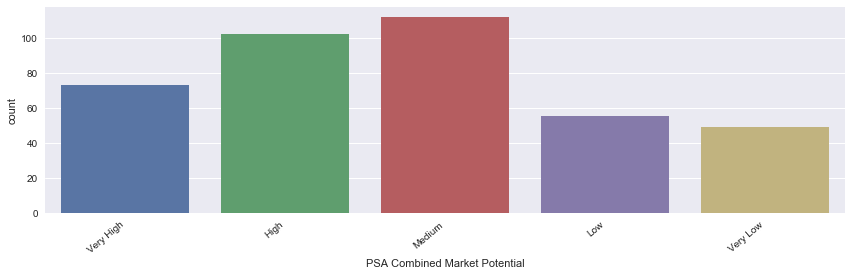

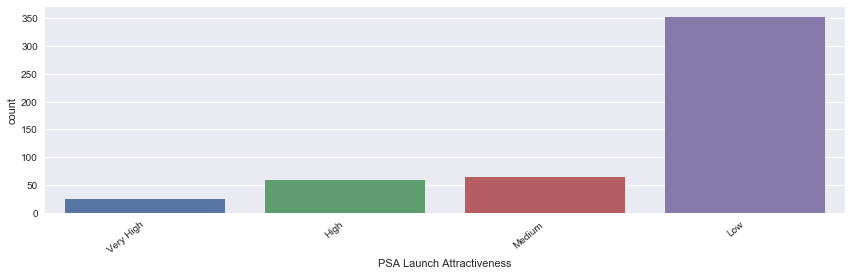

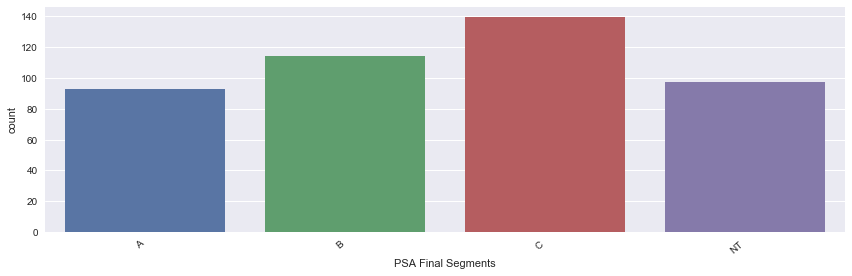

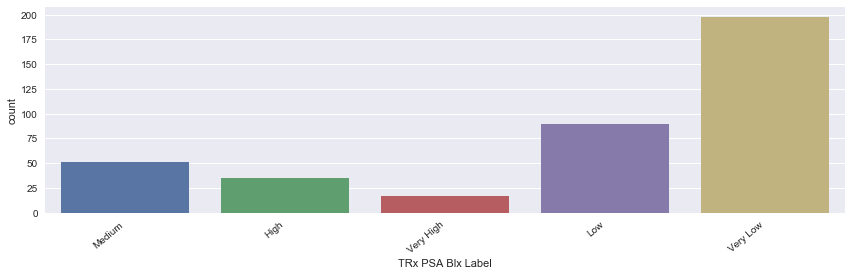

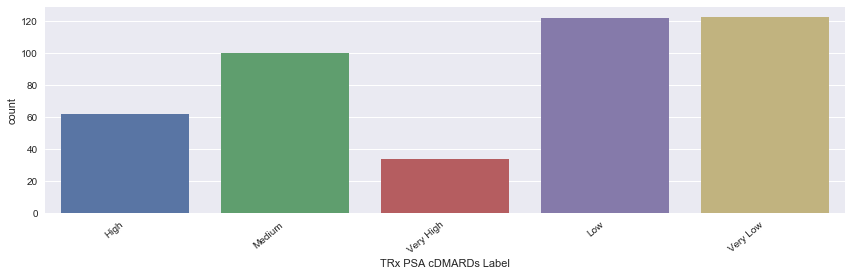

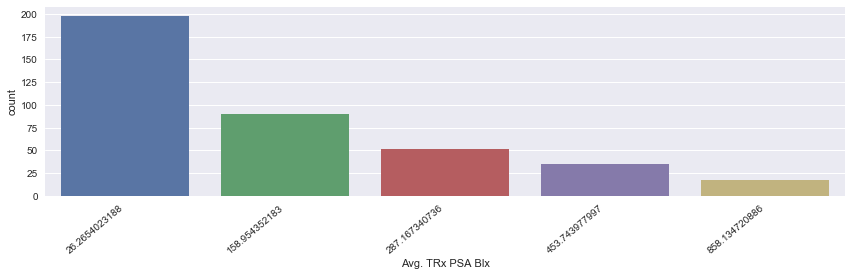

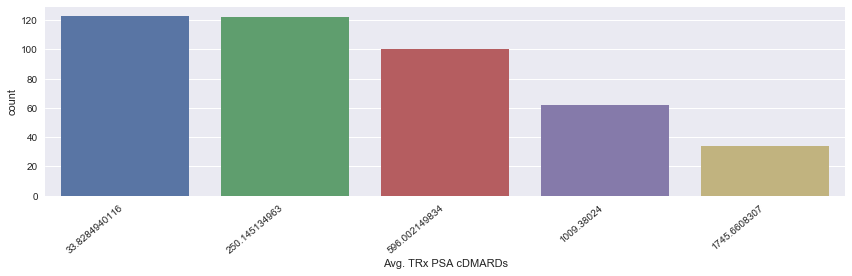

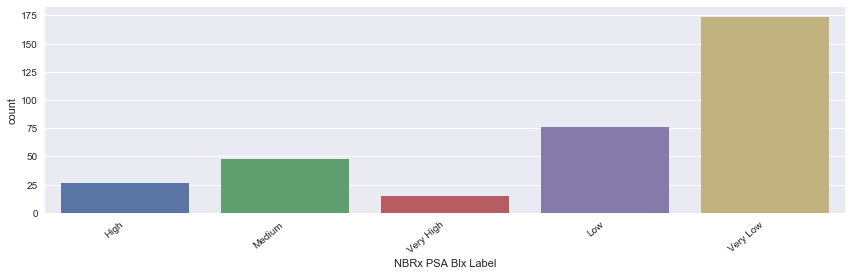

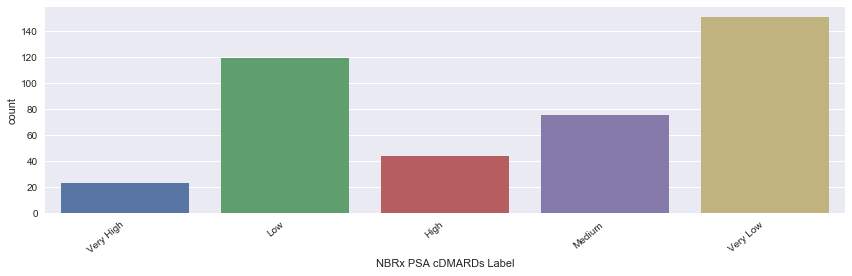

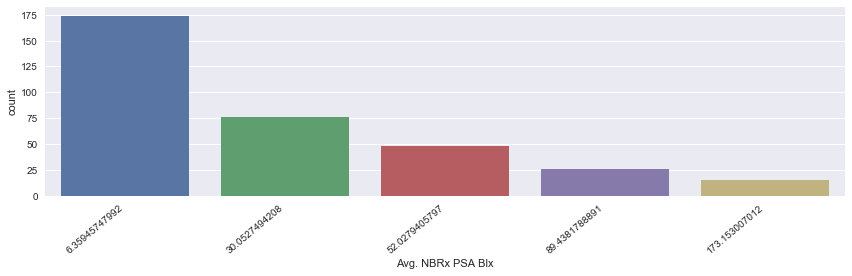

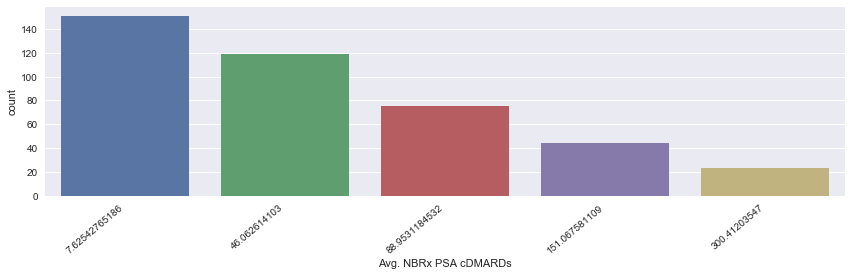

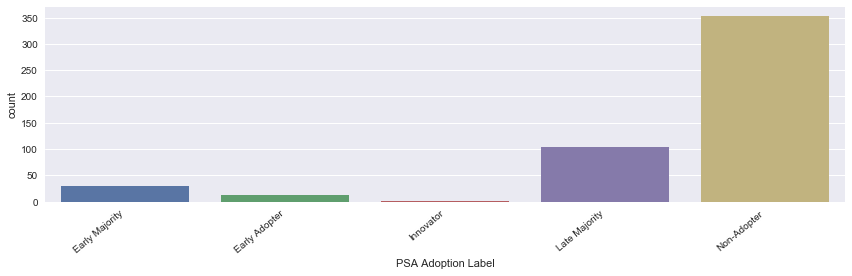

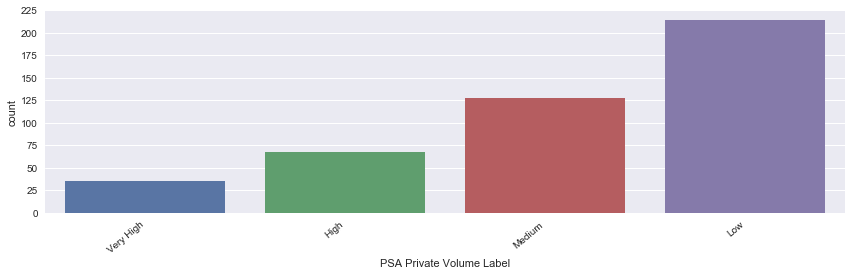

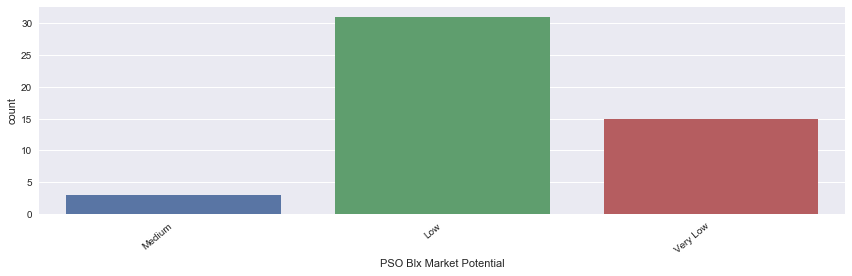

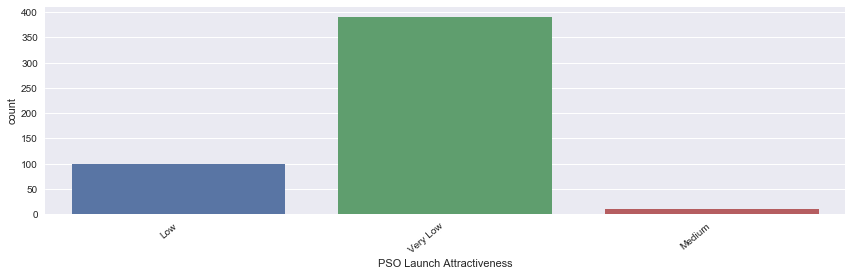

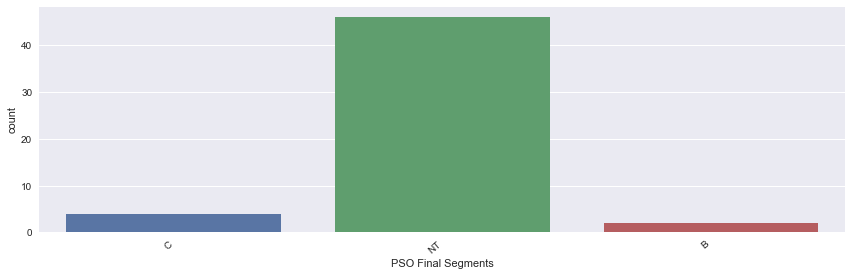

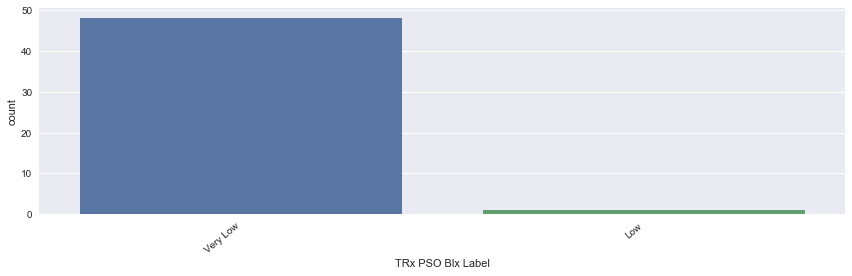

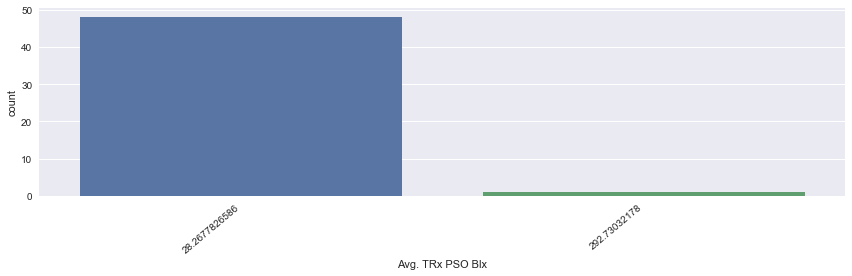

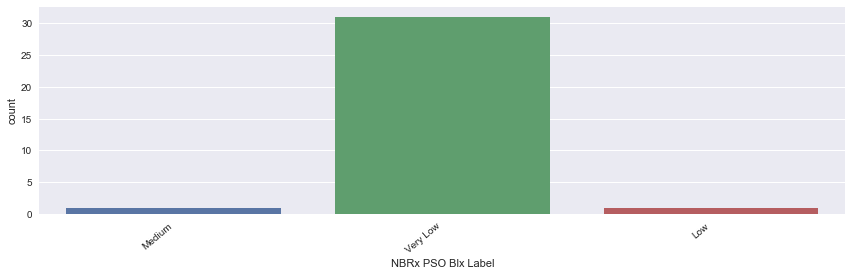

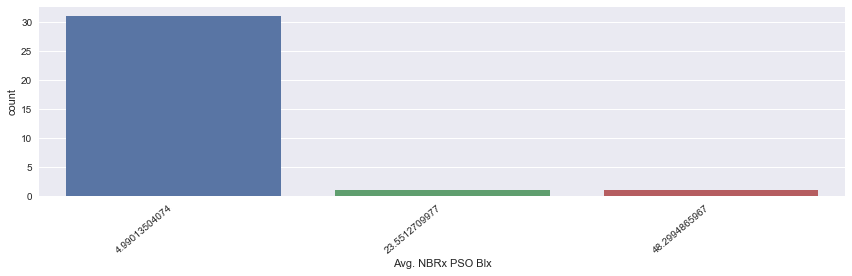

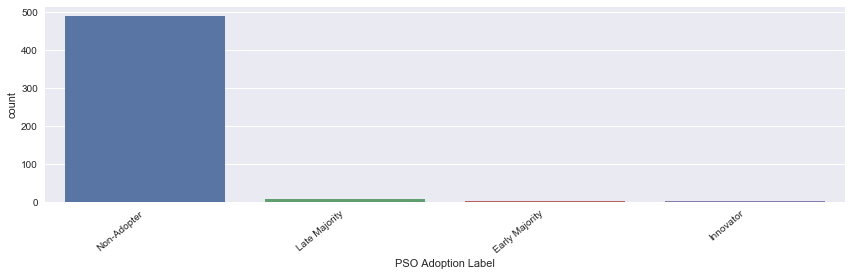

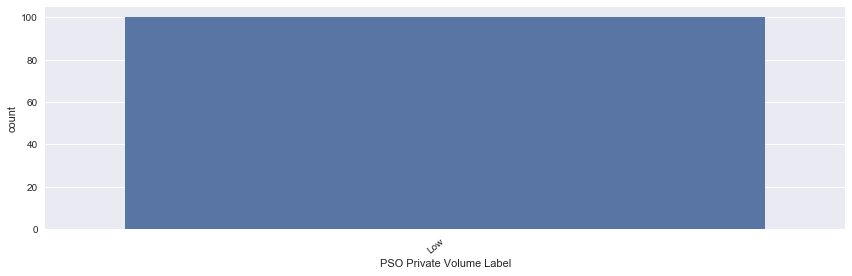

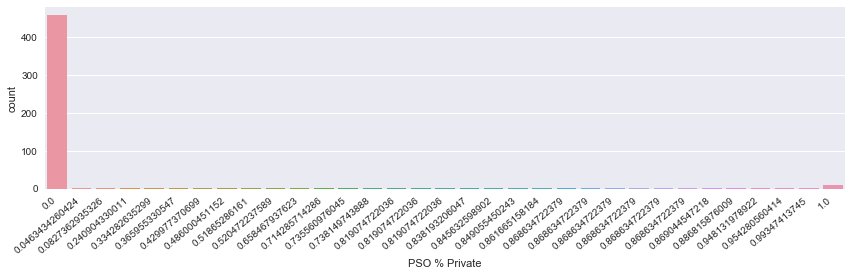

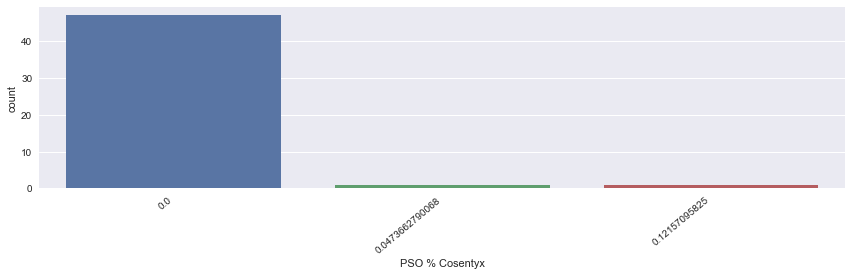

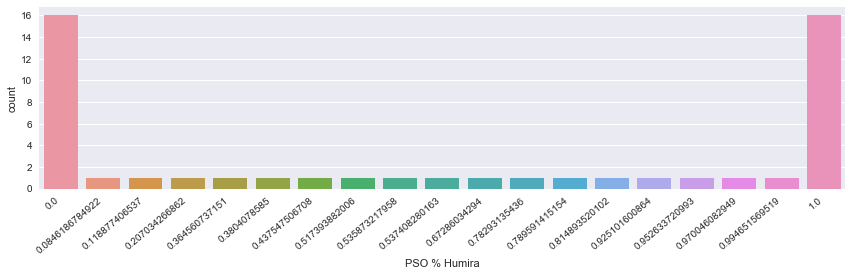

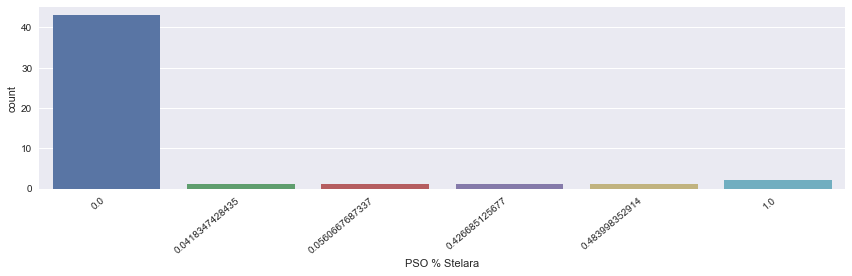

In [32]:
exclude_cols = ['FINDr ID','ONEKEY','LILLY ID','LAST NAME','FIRST & MIDDLE NAME', 'BUILDING NAME_ORG NAME', 'STREET ADDRESS1',
               'STREET ADDRESS2', 'POSTAL CODE','PHONE NUMBER', u'FAX NUMBER', 'CITY', 'RA % Private', 'RA % Enbrel', 'RA % Humira',
               'RA % Xeljanz', 'PSA % Cosentyx','PSA % Humira', 'PSA % Stelara', 'PSA % Private']
filter_cols =[ x for x in df.columns if x not in exclude_cols]
for col in filter_cols:
    graph_var(col)
    